<a href="https://colab.research.google.com/github/cortiz313/Machine-Learning-Class/blob/main/projects/Amazon_Reviews_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amazon Reviews Project
By: Christian Ortiz

So on while doing this project, it took me two attempts in order to get a result that I felt was a good representation of the data. I will annotate the code with my original attempt, and then what I changed in order to get the better result.

<br>

On the first attempt, I made certain decisions that needed to be adjusted on the second attempt. As expected, in order to perform the sentiment analysis I need to use the 'review text' column from the data. However, in this test that is the only column I used, which I changed on the subsequent test. Also, in this test I only used the first 50 words of each review, which I changed later. Finally, on this attempt, I had my validation data comprise 20% of my original training data.

On my second attempt, I changed all of these parameters. First, I combined the 'review text' column with the 'summary' column, and used all that text for my model. I also changed the maxlen parameter from 50 words to 100 words, so I would keep more words of the reviews and hopefully the model would get a better understanding of the sentiment of each review. Finally, I changed the validation split so that the validation data comprised 40% of the original training data, so I could have a understanding of how my model performed against data it had not seen.

<br>

NOTE: when I say validation data, I don't mean the validation split you do when fitting the model. I mean the train_test_split you do before that, and I call that data the 'validation data' because even though it meant to simulate test data in how it is used to check our accuracy score, it is not the true test data. The true test data is being predicted at the end of this project.

# Approach #1 - Not Optimal - 
Text - Review Text

Max Word Length - 50

Pre-Trained Embeddings - Yes

Model - CNN

Validation Split - 20%

<br>

# Approach 2 - Optimal -
Text - Review Text + Summary

Max Word Length - 100

Pre-Trained Embeddings - Yes

Model - CNN

Validation Split - 40%

<br>

NOTE: I will have separate code blocks showing my original approach and the updated one in this same dropdown.

## 1) Reading the data

Below we read the test and train data, as well as the pre-trained embeddings data (I used GLoVE) which will be used later in the process

In [1]:
# import pandas
import pandas as pd

In [2]:
# This code downloads two zip files containing Amazon reviews data for training and testing.
!wget http://34.82.108.37/amazonReviewsTrain.csv.zip
!wget http://34.82.108.37/amazonReviewsTest.csv

--2023-04-12 18:51:29--  http://34.82.108.37/amazonReviewsTrain.csv.zip
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456705 (38M) [application/zip]
Saving to: ‘amazonReviewsTrain.csv.zip’

amazonReviewsTrain. 100%[===================>]  37.63M  45.4MB/s    in 0.8s    

2023-04-12 18:51:30 (45.4 MB/s) - ‘amazonReviewsTrain.csv.zip’ saved [39456705/39456705]

--2023-04-12 18:51:30--  http://34.82.108.37/amazonReviewsTest.csv
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4240573 (4.0M) [application/octet-stream]
Saving to: ‘amazonReviewsTest.csv’

amazonReviewsTest.c 100%[===================>]   4.04M  12.8MB/s    in 0.3s    

2023-04-12 18:51:30 (12.8 MB/s) - ‘amazonReviewsTest.csv’ saved [4240573/4240573]



In [3]:
# Again we download a zip file, this time containing GloVe embeddings
!wget http://zacharski.org/files/courses/cs419/glove.6B.100d.zip

--2023-04-12 18:51:33--  http://zacharski.org/files/courses/cs419/glove.6B.100d.zip
Resolving zacharski.org (zacharski.org)... 198.199.65.227
Connecting to zacharski.org (zacharski.org)|198.199.65.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134300573 (128M) [application/zip]
Saving to: ‘glove.6B.100d.zip’

glove.6B.100d.zip   100%[===================>] 128.08M  73.5MB/s    in 1.7s    

2023-04-12 18:51:34 (73.5 MB/s) - ‘glove.6B.100d.zip’ saved [134300573/134300573]



In [4]:
# This line unzips the GloVe embeddings file that was downloaded in a previous step.
# The unzipped file contains pre-trained word vectors
!unzip glove.6B.100d.zip

Archive:  glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


In [5]:
# And again we unzip, but now the Amazon reviews training data file that was downloaded previously
# The unzipped file contains a CSV file with training data of Amazon product reviews
!unzip amazonReviewsTrain.csv.zip

Archive:  amazonReviewsTrain.csv.zip
  inflating: amazonReviewsTrain.csv  


I didn't have to unzip the test data because it was already unzipped from the download

In [6]:
# Read in the Amazon reviews training data from the CSV file
train_data = pd.read_csv('amazonReviewsTrain.csv')

# Read in the Amazon reviews test data from the CSV file
test_data = pd.read_csv('amazonReviewsTest.csv')

<ipython-input-6-6744d3449ff8>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('amazonReviewsTrain.csv')


## 2) Preparing the data

Here I fill any missing data in the 'reviewText' and 'summary' columns of the training data with an empty string.
This is necessary to prevent errors that can occur when processing text data.


### Approach 1

I did not fill the missing data with an empty string on my first approach

### Approach 2

In [7]:
# Fill any missing 'reviewText' training data with an empty string
train_data['reviewText'] = train_data['reviewText'].fillna("")

# Fill any missing 'summary' training data with an empty string
train_data['summary'] = train_data['summary'].fillna("")

In [8]:
# Fill any missing 'reviewText' test data with an empty string
test_data['reviewText'] = test_data['reviewText'].fillna("")

# Fill any missing 'summary' test data with an empty string
test_data['summary'] = test_data['summary'].fillna("")

### Continued...

In order to get a look at the columns, I print the first row from both train data and test data

In [9]:
train_data[:1]

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,positive


In [10]:
test_data[:1]

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,False,"08 17, 2016",AMKHFIJJ81LYJ,B00EA1U1X6,Frank P.,I am a (very amateur) EDM and Hip Hop Producer...,Extremely Happy.,1471392000,NaN,"{'style:': ' 5"" Monitor Speaker'}",NaN


I notice that the training data contains a label column titled 'rating' but the test data does not. This means I will not be able to test my accuracy on my predictions for the test data. This means I will need to use a train_test_split on the training data to get a training set and a validation set so I can test the accuracy later before making my test predictions.

Below I begin preparing my dataframes, removing the 'rating' column for my features df and keeping only 'rating' for my labels df

In [11]:
# Create the training features by dropping the 'rating' column
train_features = train_data.drop('rating', axis=1)

# Create the training labels by selecting the 'rating' column
train_labels = train_data['rating']

Now I will print out the rating value counts so I can get an idea of how much positive, negative, and neutral values there are.

In [12]:
# Count the number of occurrences of each rating value
counts = train_labels.value_counts()

# Print the counts
print('Positive: ', counts['positive'])
print('Negative: ', counts['negative'])
print('Neutral: ', counts['neutral'])

Positive:  191950
Negative:  14105
Neutral:  15337


Now since I need the labels to have integer values, like 0,1,2, instead of the string values that it has now, i.e. 'positive', 'negative', 'neutral', I will have to map the 'rating' column of the training data to integer labels and put that in the train_labels df.


The integer labels are 0 for 'positive' reviews, 1 for 'negative' reviews, and 2 for 'neutral' reviews.

In [13]:
# Map the 'rating' column of the training data to integer labels
train_labels = train_data['rating'].apply(lambda x: {
    'positive': 0,
    'negative': 1,
    'neutral': 2
}.get(x))

Now observe the data again (I chose a random subset of 5 rows)

In [16]:
train_labels[55:60]

55    0
56    1
57    0
58    0
59    2
Name: rating, dtype: int64

And just to be sure everything worked correctly, I will print the counts again, to make sure they are the same as before.

In [17]:
# Count the number of occurrences of each rating value
counts = train_labels.value_counts()

# Print the counts
print('Positive: ', counts[0])
print('Negative: ', counts[1])
print('Neutral: ', counts[2])

Positive:  191950
Negative:  14105
Neutral:  15337


Now below I will get my training text dataframes ready, which I did differently on each approach

### Approach 1

Below I used only the reviewText column as my training text, which led to worse results later on with my predictions. The last part of the line converts all of the text to string, because it seems there was some numbers in the text that was causing problems later in the process.

In [21]:
train_text = train_features['reviewText'].astype(str)

### Approach 2

With this approach, I concatenated the reviewText with the summary column of the training features dataframe, and put that in my training text dataframe. I did this because after reading the summary columns, I felt that this text would provide some words that were very indicative of the sentiment of the review, and could help my model in predicting text later on.

In [19]:
train_text_with_summary = train_features['reviewText'].astype(str) + ' ' + train_features['summary'].astype(str)

### Continued...

Below I look at the original reviewText vs the reviewText + summary to make sure everything looks right.

In [22]:
print(train_text[0])

Have 30 of these in operation great lights


In [23]:
print(train_text_with_summary[0])

Have 30 of these in operation great lights Five Stars


## 3) Tokenizing the Text

Below I will use the Tokenizer object to convert text data into sequences of integers. The 'num_words' parameter specifies the maximum number of words to keep in the vocabulary based on word frequency.

In [24]:
# Import the Tokenizer class from Keras
from keras.preprocessing.text import Tokenizer
# Create a Tokenizer object with a maximum vocabulary size of 20,000 words
tokenizer = Tokenizer(num_words = 20000)
# Fit the tokenizer on the training text
tokenizer.fit_on_texts(train_text_with_summary)
# Convert the text data to sequences of integers
data_sequences = tokenizer.texts_to_sequences(train_text_with_summary)

# print out the first batch of text that we looked at earlier, now as integers
data_sequences[0]

[19, 547, 9, 25, 13, 2206, 18, 560, 45, 33]

Now below I will use pad_sequences to ensure that all sequences of integers have the same length. This will pad or truncate sequences to a fixed length, here titled 'maxlen'.

### Approach #1

In my first attempt, I took a maximum of 50 words from each training text, so potentially some parts of a very long review would be cut off, and since bad reviews tend to be longer than positive ones, it makes sense that it would be important to include more words.

In [ ]:
# from keras.utils import pad_sequences
# maxlen = 50
# words = pad_sequences(data_sequences, maxlen=maxlen)
# words[0]

### Approach #2

Here I increase the maximum number of words taken from each training text to be 100, which should alleviate the issue I mentioned above with the negative reviews, and also include the text from the summary which is concatenated to the end, which seems to be only a handful of words from my observation of the data.

In [25]:
# Import the pad_sequences function from Keras
from keras.utils import pad_sequences
# Set the maximum length of all sequences to 100
maxlen = 100
# Use pad_sequences to ensure that all sequences have the same length
words = pad_sequences(data_sequences, maxlen=maxlen)
# Print the first padded sequence
words[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   19,  547,    9,   25,   13, 2206,   18,  560,   45,
         33], dtype=int32)

Now since I do not have test labels as I mentioned before, I will split the training data into a training and a validation set so that I can test the accuracy of my model later.

### Approach #1

In my first approach, I went with a standard 20% validation split on my training data. Although this seems fine, I wanted to have a larger validation set so that I could get an even better predictor of how my model was doing, since it would be testing the accuracy on more data. I also intially thought changing this would help with an overfitting issue I was having, although after thinking about it I am not sure that this parameter has anything to do with changing that, since that has more to do with when the model does its own split later.

In [ ]:
# from sklearn.model_selection import train_test_split
# amazon_train_words, amazon_val_words, amazon_train_labels, amazon_val_labels = train_test_split(words, train_labels, test_size = 0.2, random_state=42)

### Approach #2

For the reasons I mentioned above, I decided to go with a 40% validation split, as can be seen below.

In [26]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Use train_test_split to split the data into a training set and a validation set
amazon_train_words, amazon_val_words, amazon_train_labels, amazon_val_labels = train_test_split(words, train_labels, test_size = 0.4, random_state=42)

### Continued...

Below I will load the pre-trained word embeddings from the GLoVE file and stores them in a dictionary. The word embeddings will be used to initialize the weights of the neural network.

In [27]:
# Import the necessary libraries
import numpy as np

# Initialize an empty dictionary to store the word embeddings
embeddings_index = {}

# Open the file containing the word embeddings
f = open('glove.6B.100d.txt')

# Loop over each line in the file and extract the word and its associated vector
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

# Close the file
f.close()

# Print the number of word vectors found in the file
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Just to observe the vectors, lets see the embeddings for the word 'five', since we saw the words 'five stars' earlier

In [28]:
embeddings_index['five']

array([ 0.062482 ,  0.47966  ,  0.11041  , -0.32933  ,  0.48119  ,
        0.45071  ,  0.53119  ,  0.86901  , -0.97004  ,  0.099613 ,
        0.74502  ,  0.11981  ,  0.10476  ,  0.60236  ,  0.20251  ,
       -0.19277  , -0.19874  , -0.055986 , -0.73683  ,  0.45396  ,
        0.97334  ,  0.022636 , -0.095826 ,  0.34307  ,  0.73047  ,
       -0.87593  , -0.095241 , -0.38745  , -0.23327  ,  0.30393  ,
        0.15926  , -0.018173 , -0.19423  , -0.34158  ,  0.14226  ,
        0.080426 , -0.27403  ,  0.12203  , -0.49623  ,  0.55136  ,
       -0.59616  , -0.1993   ,  0.76316  , -0.30328  ,  0.49749  ,
        0.20581  , -0.15059  , -0.77498  , -0.25081  , -0.13317  ,
       -0.69645  , -0.78776  , -0.23693  ,  1.2415   , -0.073454 ,
       -2.3672   , -0.096282 , -0.13515  ,  1.9153   ,  1.3775   ,
       -0.53319  ,  0.81572  ,  0.036566 ,  0.36214  ,  0.22786  ,
        0.40366  ,  0.21622  ,  0.48993  ,  0.094843 ,  0.023101 ,
       -0.2485   ,  0.24044  , -0.10915  , -0.06291  ,  0.0871

Below this code block constructs an embedding matrix that maps each word in the vocabulary to a corresponding pre-trained word vector. Words not found in the pre-trained embedding index are assigned a 0. The embedding matrix will be used to initialize the weights of the neural network.


In [29]:
# Set the dimensions of the word embedding vectors and the maximum number of words to be included in the vocabulary
embedding_dim = 100
max_words = 20000

# Get the word index from the Tokenizer object
word_index = tokenizer.word_index

# Initialize an empty matrix to store the embedding vectors
embedding_matrix = np.zeros((max_words, embedding_dim))

# Loop over each word in the word index and assign its corresponding embedding vector to the embedding matrix
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # If the word is found in the pre-trained embedding index, assign its embedding vector to the matrix
            embedding_matrix[i] = embedding_vector
            # Words not found in embedding index will be all-zeros.

## 4) Build and fit the model

Now below, we will be using a Convolutional Neural Network, starting with the Embedding layer, which will be given the weights from our embedding_matrix, in order to learn the associations between our training text and labels, which we will be using to train this model momentarily. 


In [31]:
# Import necessary layers and the model
from keras import layers
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Initialize the sequential model
model = Sequential()

# Add embedding layer
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

# Add Conv1D layer with 64 filters and kernel size of 3
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add second Conv1D layer with 64 filters and kernel size of 3
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add dropout layer with rate of 0.5
model.add(layers.Dropout(0.5))

# Add MaxPooling1D layer with pool size of 2
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add a Dense output layer with 3 units and softmax activation function
# We add this layer with 3 units because there are 3 possible classifications, 'positive', 'negative' and 'neutral'
model.add(Dense(3, activation='softmax'))

Let's take a quick look at the summary of this model

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 64)            12352     
                                                                 
 dropout_1 (Dropout)         (None, 96, 64)            0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 48, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                      

Now, as I just mentioned, we will set the weights of the Embedding layer to be that which we received from the pre-trained GLoVe embeddings. We set it trainable to False so that the weights of this layer are not adjusted as the network is adjusting the other weights.

In [33]:
# Set the weights of the embedding layer to the pre-trained GloVe embeddings
model.layers[0].set_weights([embedding_matrix])

# Set the embedding layer to be non-trainable
model.layers[0].trainable = False

Below we will compile the model, using sparse_categorical_crossentropy because we will be dealing with the probabilites of the text belonging to each of the 3 different labels, i.e. positive, negative, neutral

In [34]:
# Compile the model using rmsprop optimizer, sparse categorical crossentropy as loss function and accuracy as the evaluation metric
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

And now we can finally fit the model. I tried a few different values for the different parameters, but these seem to give the best result. Also, this is the validation split I spoke about earlier. The model creates its own validation split, separate from what we did earlier, to train the model. 

In [35]:
# Here we fit the model with our training text and our training labels
history = model.fit(amazon_train_words, amazon_train_labels,
                    epochs=10, 
                    batch_size=32, 
                     validation_split=0.2,
      validation_steps=50) 

Epoch 1/10
3321/3321 [==============================] - 28s 4ms/step - loss: 0.3654 - acc: 0.8761 - val_loss: 0.2855 - val_acc: 0.9038
Epoch 2/10
3321/3321 [==============================] - 16s 5ms/step - loss: 0.3018 - acc: 0.8950 - val_loss: 0.2586 - val_acc: 0.9119
Epoch 3/10
3321/3321 [==============================] - 13s 4ms/step - loss: 0.2823 - acc: 0.9017 - val_loss: 0.2443 - val_acc: 0.9181
Epoch 4/10
3321/3321 [==============================] - 15s 4ms/step - loss: 0.2725 - acc: 0.9044 - val_loss: 0.2600 - val_acc: 0.9144
Epoch 5/10
3321/3321 [==============================] - 16s 5ms/step - loss: 0.2648 - acc: 0.9067 - val_loss: 0.2508 - val_acc: 0.9181
Epoch 6/10
3321/3321 [==============================] - 13s 4ms/step - loss: 0.2581 - acc: 0.9094 - val_loss: 0.2437 - val_acc: 0.9194
Epoch 7/10
3321/3321 [==============================] - 13s 4ms/step - loss: 0.2516 - acc: 0.9109 - val_loss: 0.2415 - val_acc: 0.9212
Epoch 8/10
3321/3321 [==============================] -

## 5) Observe the Accuracy and Loss Values

And now let's observe the accuracy and loss values

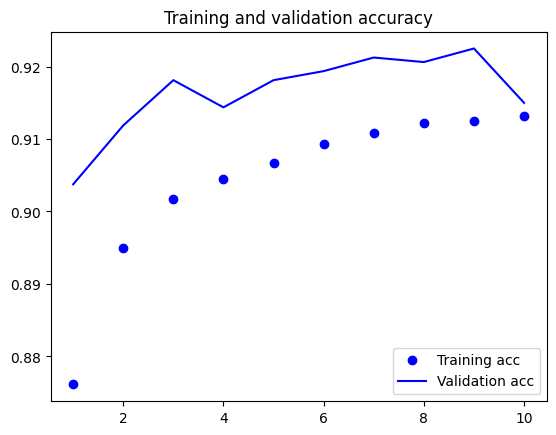

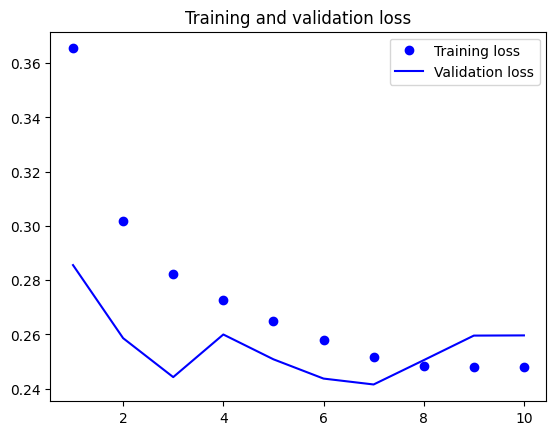

In [36]:
# Import the pyplot module from the matplotlib library
import matplotlib.pyplot as plt

# Here we extract the training and validation accuracy values as well as the training and validation loss values from a history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# This line creates an iterable object epochs containing integer from 1 to the length of the acc array + 1
epochs = range(1, len(acc) + 1)

# Here we plot the training and validation accuracy values as well as add labels, a title, and a legend to the plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# These lines create a new figure, plot the training and validation loss values, add labels, a title, and a legend to the plot 
# and finally display the figure using the show() function.
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Although it is not perfect, it does not seem to be overfitting the data the way that it was on my first attempt. 

And finally, let's use the original validation data the we created earlier to get an accuracy score on that data

In [37]:
# Get the accuracy and loss against the validation data
test_loss, test_acc, = model.evaluate(amazon_val_words, amazon_val_labels)

# Print the accuracy and loss values
print("Accuracy %f    Loss: %f" % (test_acc, test_loss))

2768/2768 [==============================] - 9s 3ms/step - loss: 0.2755 - acc: 0.9092
Accuracy 0.909222    Loss: 0.275516


As you can see, I got a 91% accuracy on this validation data. On my first attempt, my accuracy was 86.75%. Although both values are good, the real issue came on this next part, predicting the true test data...

First Result: 86.75% accuracy on the validation data. CNN, with freeze, GLoVE, and not combining the summary text to the revew text

Second Result: 91% accuracy on validation data. CNN, with freeze, GLoVE, combined with summary text, 100 words maxlen, 40% test train split, filling na with "" for review text and summary text

## 6) Predicting the Test Data

Now that it is time to predict the sentiment for the test data, we must manipulate it so that we can send it through our model.

Below, as before, we get our testing text from test_data. As before, approach 1 involved just the reviewText, and approach 2 combined it with summary

### Approach #1

In [38]:
test_text = test_data['reviewText'].astype(str)

### Approach #2

In [39]:
test_text_with_summary = test_data['reviewText'].astype(str) + ' ' + test_data['summary'].astype(str)

In [40]:
print(test_text[0])

I am a (very amateur) EDM and Hip Hop Producer who is on a tight budget.  While excellent for the money, my My Dayton Audio B652 bookshelf speakers just weren't cutting it anymore, especially with the crappy lepy amp I got.  Buying a decent studio amp was going to be almost as much as buying a set of powered real studio monitors, so I decided to just upgrade to  legit monitors.  I chose the Mr5's over the JBL LSR305's, Krk Rokit 5's, and Presonus Eris E5's because the Mackies are $60 cheaper a pair, and the matching sub, (which I plan to get soon.) is $100 cheaper than the competing brand's 10"subs.  While I can't say I A/B'd the Mackies with the other brands, I can still say these are great speakers, and I don't feel like I'm missing out.  These speakers sound crystal clear, and are loud enough to hurt my ears in my very small home studio.  These won't fill an e large living room with ear splitting PA volumes however, but that's not what they're made for.  They're made for near field 

In [36]:
print(test_text_with_summary[0])

I am a (very amateur) EDM and Hip Hop Producer who is on a tight budget.  While excellent for the money, my My Dayton Audio B652 bookshelf speakers just weren't cutting it anymore, especially with the crappy lepy amp I got.  Buying a decent studio amp was going to be almost as much as buying a set of powered real studio monitors, so I decided to just upgrade to  legit monitors.  I chose the Mr5's over the JBL LSR305's, Krk Rokit 5's, and Presonus Eris E5's because the Mackies are $60 cheaper a pair, and the matching sub, (which I plan to get soon.) is $100 cheaper than the competing brand's 10"subs.  While I can't say I A/B'd the Mackies with the other brands, I can still say these are great speakers, and I don't feel like I'm missing out.  These speakers sound crystal clear, and are loud enough to hurt my ears in my very small home studio.  These won't fill an e large living room with ear splitting PA volumes however, but that's not what they're made for.  They're made for near field 

We will do the same thing we did previously, converting the text to integers and padding them

In [41]:
test_sequences = tokenizer.texts_to_sequences(test_text_with_summary)
test_sequences[0]

[4,
 115,
 2,
 24,
 2421,
 8594,
 3,
 4523,
 4863,
 4656,
 259,
 8,
 14,
 2,
 500,
 771,
 171,
 135,
 7,
 1,
 172,
 11,
 11,
 14467,
 260,
 8650,
 390,
 37,
 2216,
 1756,
 6,
 1636,
 348,
 12,
 1,
 2362,
 90,
 4,
 133,
 383,
 2,
 303,
 271,
 90,
 29,
 224,
 5,
 32,
 324,
 21,
 75,
 21,
 383,
 2,
 106,
 9,
 895,
 292,
 271,
 829,
 28,
 4,
 572,
 5,
 37,
 744,
 5,
 4638,
 829,
 4,
 1792,
 1,
 124,
 1,
 2766,
 18848,
 4814,
 5908,
 6250,
 3,
 2374,
 9383,
 103,
 1,
 10368,
 22,
 1350,
 635,
 2,
 679,
 3,
 1,
 2916,
 1263,
 83,
 4,
 1024,
 5,
 54,
 913,
 8,
 487,
 635,
 58,
 1,
 5352,
 12950,
 280,
 3342,
 171,
 4,
 170,
 180,
 4,
 2,
 12923,
 1,
 10368,
 12,
 1,
 74,
 786,
 4,
 44,
 126,
 180,
 25,
 22,
 18,
 390,
 3,
 4,
 72,
 155,
 34,
 84,
 1324,
 50,
 25,
 390,
 30,
 2670,
 380,
 3,
 22,
 398,
 146,
 5,
 2220,
 11,
 1096,
 13,
 11,
 24,
 137,
 319,
 271,
 25,
 296,
 1814,
 49,
 457,
 474,
 1934,
 350,
 12,
 923,
 4756,
 823,
 2000,
 246,
 17,
 276,
 20,
 63,
 344,
 101,
 7,
 344,
 101

In [42]:
test_words = pad_sequences(test_sequences, maxlen=maxlen)
test_words[0]

array([   83,     4,  1024,     5,    54,   913,     8,   487,   635,
          58,     1,  5352, 12950,   280,  3342,   171,     4,   170,
         180,     4,     2, 12923,     1, 10368,    12,     1,    74,
         786,     4,    44,   126,   180,    25,    22,    18,   390,
           3,     4,    72,   155,    34,    84,  1324,    50,    25,
         390,    30,  2670,   380,     3,    22,   398,   146,     5,
        2220,    11,  1096,    13,    11,    24,   137,   319,   271,
          25,   296,  1814,    49,   457,   474,  1934,   350,    12,
         923,  4756,   823,  2000,   246,    17,   276,    20,    63,
         344,   101,     7,   344,   101,     7,  1026,  2383,  1689,
          13,   137,  3462,  1274,    77,   144,  2869,   365,   634,
         234], dtype=int32)

And here we will finally get our predictions for our test data

In [44]:
# Use the model to predict the sentiment of the test text 
preds = model.predict(test_words)

313/313 [==============================] - 1s 2ms/step


These predictions are in the form of probabilities. So each row of text will have 3 probabilities, each representing its possibility of its sentiment being each of the three labels, 'positive', 'negative' and 'neutral'

In [47]:
preds[:5]

array([[0.98029995, 0.00344624, 0.01625378],
       [0.6931783 , 0.10672816, 0.20009357],
       [0.85686654, 0.02255698, 0.1205764 ],
       [0.36865118, 0.25808382, 0.37326503],
       [0.8203202 , 0.03180399, 0.14787585]], dtype=float32)

So in the first case, the model predicts the text has a 98.02% chance of being positive, a 0.3% chance of being negative, and a 1.6% chance of being neutral.

Now we simply need to take these values, find the highest probability for each row of text, and assign that as the sentiment for that row, which we do below. 

In [48]:
# Define a list of class labels in the order of the columns of the 'predictions' array
class_labels = ['positive', 'negative', 'neutral']

# Convert predicted probabilities to class labels, by getting the max value for each row
predicted_labels = [class_labels[np.argmax(pred)] for pred in preds]

To quick observe the data, let's print the predicted_labels

In [49]:
print(predicted_labels)

['positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positi

And now let's look at the count for each label, so we can see how the sentiments are distributed

In [51]:
from collections import Counter
label_counts = Counter(predicted_labels)
print(label_counts)

Counter({'positive': 9158, 'negative': 443, 'neutral': 399})


When I initially reached this part on my first approach, it turned out that every single value in my predicted_labels array showed a 'positive' prediction, with not a single 'negative' or 'neutral' value. This seemed obviously wrong, and a quick look at some of the reviewText proved that it was. That led me to include all of the changes I've shown throughout this notebook, and how I came to this result I have now. I believe the most important parts to fixing my result were increasing the maximum length of the words I was including, because I probably was not including enough words for the model to detect 'negative' or 'neutral' sentiments, and also including the summary text with my reviewText, because that usually includes a few powerful words that highly indicated the sentiment of the review.

Now on the result we have now, we can still see that the positive values far outweigh the negative and neutral values, however if we look back to when we observed the distribution of the training labels, we will notice that in that case, the positive reviews also far outweigh the rest, so it seems that we are on the right track. Also, for the training labels, we saw that the negative and neutral reviews were nearly even, which is the same situation that we see here. Based on that logic, coupled with the validation accuracy we saw earlier, would lead me to believe that the result we have here is valid.

Now finally, we can save these predictions into the specificed txt file and export it for submission

In [60]:
# Open a file for writing
with open('amazonReviewsPredictions.txt', 'w') as f:
    # Write each item in the list to a new line in the file
    for item in predicted_labels:
        f.write("%s\n" % item)

And a final test to make sure my txt is formatted properly.

In [61]:
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok")
test()

'file looks ok'

I am happy to have this result and I have enjoyed this project very much.